In [1]:
import numpy as np
import matplotlib.pyplot as plt
import binprism as bp
from scipy.stats import pearsonr as r
import time

In [2]:
eb_counts = [590, 353, 301, 230, 393, 655, 1469, 2067, 2549, 2375, 1783, 2076,
             2193, 2017, 2513, 3262, 3294, 2915, 2657, 2412, 2323, 1928, 1925, 1118]
wb_counts = [387, 316, 237, 219, 442, 1491, 2472, 2716, 2809, 2294, 2159, 1991,
             2380, 2119, 2052, 2333, 2434, 2122, 2188, 2385, 1821, 1760, 1314, 836]
hours = list(range(24))
n_harmonics = 5
time_range = (0, 24)

# Estimate profiles

In [3]:
t0 = time.time()
eb_profile_linear = bp.fit(eb_counts, hours, n_harmonics, time_range)
t1 = time.time()
wb_profile_linear = bp.fit(wb_counts, hours, n_harmonics, time_range)
t2 = time.time()
print('Eastbound: {}'.format(t1 - t0))
print('Westbound: {}'.format(t2 - t1))
print('Total:     {}'.format(t2 - t0))

Eastbound: 0.014959335327148438
Westbound: 0.008324146270751953
Total:     0.02328348159790039


In [4]:
t0 = time.time()
eb_profile_nonlinear = bp.fit(eb_counts, hours, n_harmonics, time_range, optimize = True)
t1 = time.time()
wb_profile_nonlinear = bp.fit(wb_counts, hours, n_harmonics, time_range, optimize = True)
t2 = time.time()
print('Eastbound: {}'.format(t1 - t0))
print('Westbound: {}'.format(t2 - t1))
print('Total:     {}'.format(t2 - t0))

Eastbound: 2.8926095962524414
Westbound: 3.5308938026428223
Total:     6.423503398895264


# Eastbound Check

In [5]:
print((eb_profile_linear.dist.log_pdf_coef.c))
print((eb_profile_nonlinear.dist.log_pdf_coef.c))

[-2.07232848-1.90884332e-17j -0.32788341+3.40836381e-01j
 -0.06865984+2.58643049e-01j  0.13560728+8.09984106e-02j
  0.0141557 +1.15786275e-03j -0.02668538+4.40790769e-03j]
[-2.08155789+0.j         -0.33305462+0.35143701j -0.06005887+0.26923305j
  0.15110018+0.08169448j  0.02224015-0.00482918j -0.01633153-0.0097219j ]


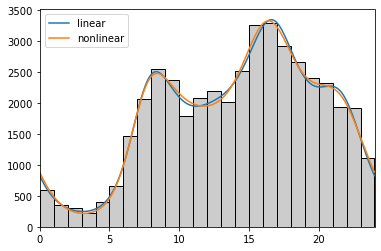

In [6]:
plt.bar(range(24), eb_counts, width = 1, align = 'edge', edgecolor = 'k', facecolor = '#cccccc')
eb_profile_linear.plot(1440, label = 'linear')
eb_profile_nonlinear.plot(1440, label = 'nonlinear')
plt.xlim(0, 24)
plt.legend(loc = 'best')
plt.show()

In [7]:
eb_counts_linear = eb_profile_linear[range(25)]
eb_counts_nonlinear = eb_profile_nonlinear[range(25)]

print('Correlation')
print('Linear:    ' + str(r(eb_counts, eb_counts_linear)))
print('Nonlinear: ' + str(r(eb_counts, eb_counts_nonlinear)))
print('\n')
print('%RMSE')
print('Linear:    {}%'.format(100*np.linalg.norm(eb_counts_linear - eb_counts)/np.sqrt(len(eb_counts))/np.array(eb_counts).mean()))
print('Nonlinear: {}%'.format(100*np.linalg.norm(eb_counts_nonlinear - eb_counts)/np.sqrt(len(eb_counts))/np.array(eb_counts).mean()))

Correlation
Linear:    (0.9906559776437415, 1.5644472426954018e-20)
Nonlinear: (0.9915522306799751, 5.181335554699723e-21)


%RMSE
Linear:    7.040186622355783%
Nonlinear: 6.697025024347734%


# Westbound check

In [8]:
print((wb_profile_linear.dist.log_pdf_coef.c))
print((wb_profile_nonlinear.dist.log_pdf_coef.c))

[-2.07008372-1.74972490e-17j -0.38733286+2.10298230e-01j
 -0.14007134+2.88783925e-01j  0.08523401+1.42588500e-01j
  0.06165729-1.82098603e-02j -0.01919281-3.16324657e-02j]
[-2.07287376+0.j         -0.39582748+0.20964734j -0.15291396+0.29220642j
  0.07263646+0.15749381j  0.06381948+0.00820178j  0.00762041-0.01275529j]


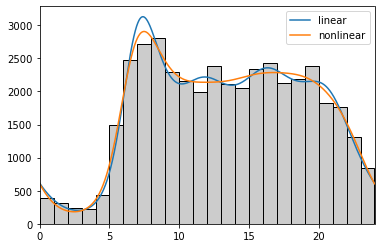

In [9]:
plt.bar(range(24), wb_counts, width = 1, align = 'edge', edgecolor = 'k', facecolor = '#cccccc')
wb_profile_linear.plot(1440, label = 'linear')
wb_profile_nonlinear.plot(1440, label = 'nonlinear')
plt.xlim(0, 24)
plt.legend(loc = 'best')
plt.show()

In [10]:
wb_counts_linear = wb_profile_linear[range(25)]
wb_counts_nonlinear = wb_profile_nonlinear[range(25)]

print('Correlation')
print('Linear:    ' + str(r(wb_counts, wb_counts_linear)))
print('Nonlinear: ' + str(r(wb_counts, wb_counts_nonlinear)))
print('\n')
print('%RMSE')
print('Linear:    {}%'.format(100*np.linalg.norm(wb_counts_linear - wb_counts)/np.sqrt(len(wb_counts))/np.array(wb_counts).mean()))
print('Nonlinear: {}%'.format(100*np.linalg.norm(wb_counts_nonlinear - wb_counts)/np.sqrt(len(wb_counts))/np.array(wb_counts).mean()))

Correlation
Linear:    (0.9859742326477203, 1.3344897277634653e-18)
Nonlinear: (0.9895916737808168, 5.099771068977725e-20)


%RMSE
Linear:    8.13328234646594%
Nonlinear: 6.958450884628865%
